# Visualization of the CTLearn impact
The output of CTLearn are stored in HDF5 format 

### Import libraries
First, we need to import some libraries. 

In [1]:
# Data handling with numpy
import numpy as np
#np.set_printoptions(threshold=np.inf)

import os
import astropy.units as u

# Plotting libraries
import ctaplot
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# (Default ctaplot) energy binning 
E_bin = np.logspace(np.log10(2.51e-02), 2, 19)
E = ctaplot.ana.logbin_mean(E_bin)
from ctapipe.io import read_table
from astropy.table import Table, vstack, join

run008 = "/Users/tjarkmiener/muon/data/dl2/dl2_muon_ctapipe_run008.h5"
run009 = "/Users/tjarkmiener/muon/data/dl2/dl2_muon_ctapipe_run009.h5"

In [2]:
energy_dl2_table = vstack([read_table(run008, "/dl2/event/telescope/energy/CTLearn/tel_001"), read_table(run009, "/dl2/event/telescope/energy/CTLearn/tel_001")])
energy_dl2_table = energy_dl2_table[energy_dl2_table["CTLearn_tel_is_valid"]]
impact_dl2_table = vstack([read_table(run008, "/dl2/event/telescope/impact/CTLearn/tel_001"), read_table(run009, "/dl2/event/telescope/impact/CTLearn/tel_001")])
impact_dl2_table = impact_dl2_table[impact_dl2_table["CTLearn_tel_is_valid"]]
simulation_table = vstack([read_table(run008, "/simulation/event/subarray/shower"), read_table(run009, "/simulation/event/subarray/shower")])

joined_table = join(energy_dl2_table, impact_dl2_table, keys=["obs_id", "event_id", "tel_id"])
joined_table = join(joined_table, simulation_table, keys=["obs_id", "event_id"])
joined_table.keep_columns(["obs_id", "event_id", "CTLearn_tel_energy", "CTLearn_tel_impact_x", "CTLearn_tel_impact_y", "true_energy", "true_alt", "true_az", "true_core_x", "true_core_y", "true_h_first_int", "true_x_max", "true_starting_grammage", "true_shower_primary_id"])

## Impact regression

True impact map


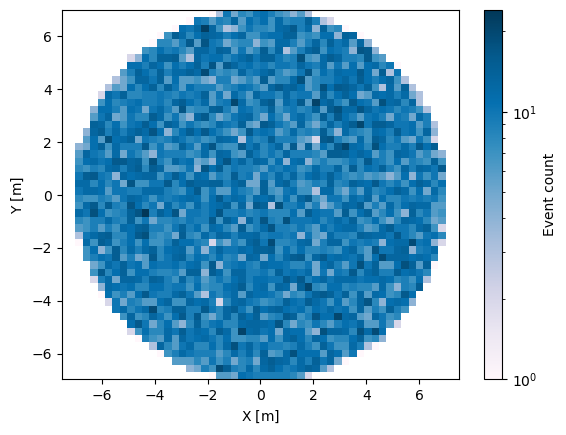

In [3]:
plt.close('all')
print("True impact map")
ax1 = ctaplot.plots.plot_impact_point_heatmap(joined_table["true_core_x"].data * u.m, joined_table["true_core_y"].data * u.m)

CTLearn impact map


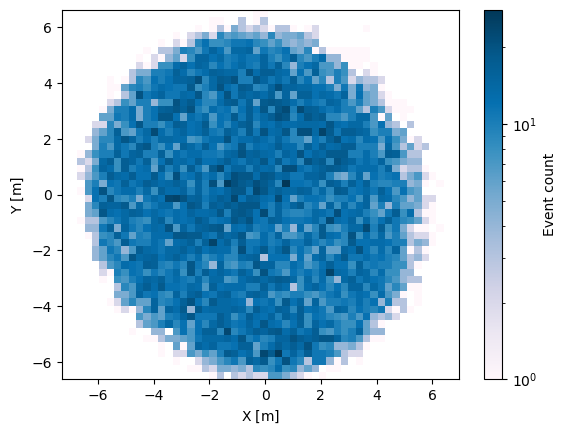

In [4]:
print("CTLearn impact map")
ax2 = ctaplot.plots.plot_impact_point_heatmap(joined_table["CTLearn_tel_impact_x"] * u.m, joined_table["CTLearn_tel_impact_y"] * u.m)


Migration core_x


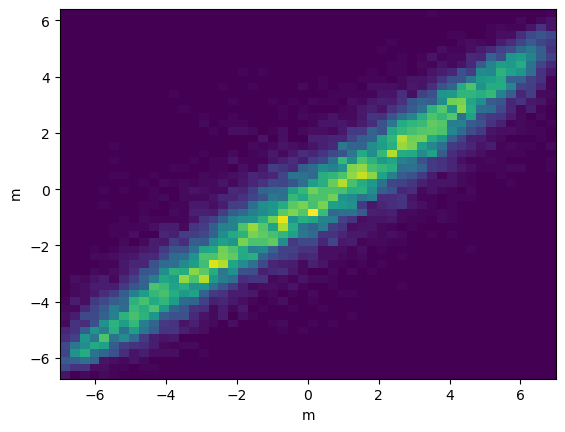

In [5]:
print("Migration core_x")
ax2 = ctaplot.plots.plot_migration_matrix(joined_table["true_core_x"].data * u.m, joined_table["CTLearn_tel_impact_x"] * u.m)


Migration core_y


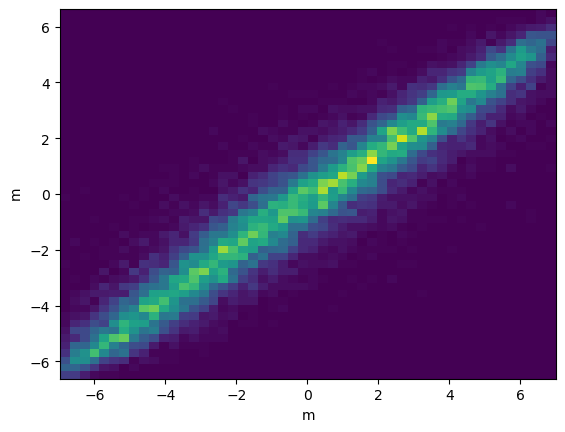

In [6]:
print("Migration core_y")
ax2 = ctaplot.plots.plot_migration_matrix(joined_table["true_core_y"].data * u.m, joined_table["CTLearn_tel_impact_y"] * u.m)

impact radius


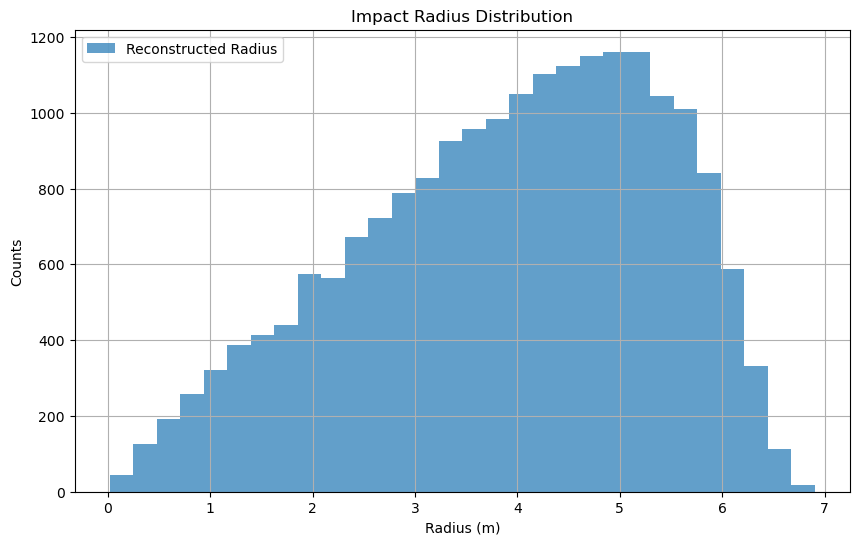

In [7]:
print("impact radius")
reco_radius = np.sqrt(joined_table["CTLearn_tel_impact_x"] **2 + joined_table["CTLearn_tel_impact_y"] **2)

plt.figure(figsize=(10,6))
plt.hist(reco_radius, bins=30, alpha=0.7, label='Reconstructed Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Counts')
plt.title('Impact Radius Distribution')
plt.legend()
plt.grid()
plt.show()

Migration impact radius


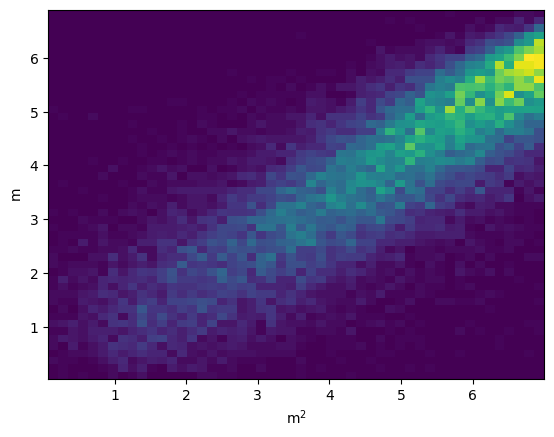

In [8]:
print("Migration impact radius")
reco_radius = np.sqrt(joined_table["CTLearn_tel_impact_x"] **2 + joined_table["CTLearn_tel_impact_y"] **2)
true_radius = np.sqrt(joined_table["true_core_x"] **2 + joined_table["true_core_y"] **2)

ax2 = ctaplot.plots.plot_migration_matrix(true_radius * u.m, reco_radius * u.m)


Impact resolution per energy


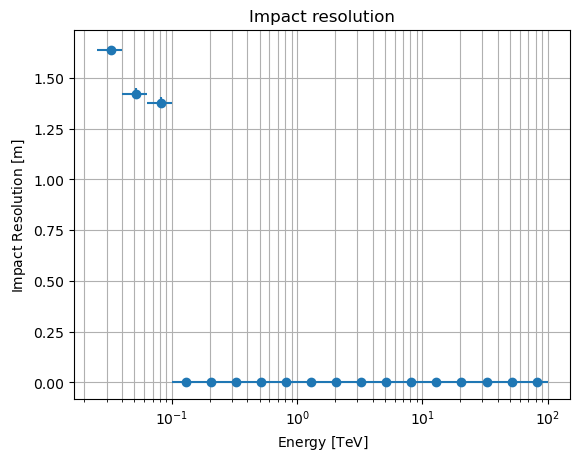

In [9]:
print("Impact resolution per energy")
ax2 = ctaplot.plots.plot_impact_resolution_per_energy(
    true_x = joined_table["true_core_x"].data * u.m, 
    reco_x = joined_table["CTLearn_tel_impact_x"] * u.m, 
    true_y = joined_table["true_core_y"].data * u.m, 
    reco_y = joined_table["CTLearn_tel_impact_y"] * u.m, 
    true_energy = joined_table["true_energy"].data * u.TeV,
)


Impact parameter error 


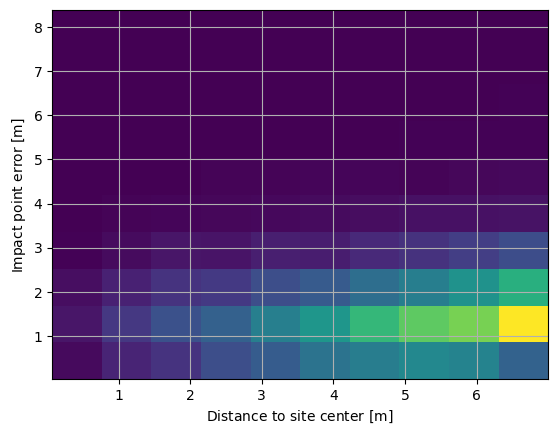

In [10]:
print("Impact parameter error ")
ax2 = ctaplot.plots.plot_impact_parameter_error_site_center(
    true_x = joined_table["true_core_x"].data * u.m, 
    reco_x = joined_table["CTLearn_tel_impact_x"] * u.m, 
    true_y = joined_table["true_core_y"].data * u.m, 
    reco_y = joined_table["CTLearn_tel_impact_y"] * u.m, 
)

## Energy regression

Energy resolution per energy


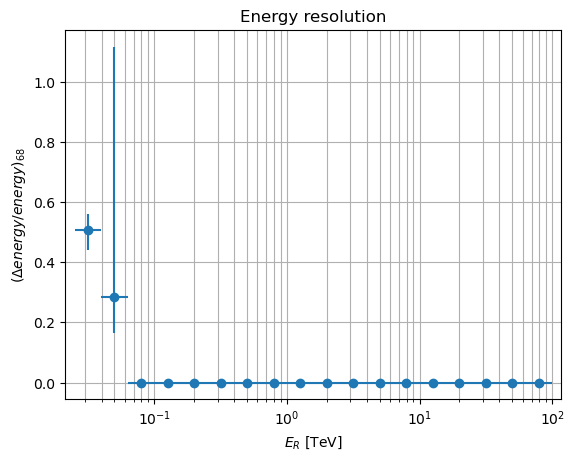

In [11]:
print("Energy resolution per energy")
ax2 = ctaplot.plots.plot_energy_resolution(
    true_energy = joined_table["true_energy"].data * u.TeV,
    reco_energy = joined_table["CTLearn_tel_energy"].data * u.TeV, 
)